<a href="https://colab.research.google.com/github/Sourabhpatel1/Capstone-Project-Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# upgrading matplotlib
# Restart the runtime and then run the notebook
!pip install matplotlib --upgrade

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score

In [4]:
# magic inline for matplotlib
%matplotlib inline

In [5]:
# Setting figuresize for plots and graphs
plt.rcParams['figure.figsize'] = (14,10)

In [6]:
# Loading the data
df = pd.read_csv('/content/drive/MyDrive/Capstone Project - 3/health_insurance.csv')

In [7]:
# Checking first few rows of the dataframe
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
# Setting id as index as it is unique number assigned to each person
df = df.set_index('id', drop=True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [9]:
# Checking info for null values and data types in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


# **First Observations :**

---


1. There is no missing value in the dataset.
2. There are Six categorical columns in the dataset, Gender, Driving License, Previously Insured, Vehicle Age, Vehicle Damage and Policy Sales Channel apart from the target column "Response".
3. Three of the six categorical features are numerical and other three are in string datatype.
4. The three string categorical columns needs to be converted to numerical features for feeding into the model.

In [10]:
#converting gender ito numerical values, 1 for male and 0 for female
df['Gender'] = df['Gender'].map({
    "Male" : 1,
    "Female": 0,
})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
# Converting vehicle damage to numerical values, 1 for yes and 0 for no
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({
    'Yes':1,
    'No':0,
})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [12]:
# Getting dummies for vehicle age
dummies = pd.get_dummies(df['Vehicle_Age'])

# Merging dummies to the dataframe and dropping original vehicle age column
df = df.merge(dummies, on='id', how='left').drop('Vehicle_Age', axis=1)

# Checking Head
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years
id,,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


In [13]:
# Renaming '> 2 Years' column to '> 2 Year' for consistency
df = df.rename(columns={
    '> 2 Years': '> 2 Year'
})

df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Year
id,,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


# **Exploratory Data Analysis**


In [14]:
# Checing description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,381109.0,0.540761,0.498336,0.0,0.0,1.0,1.0,1.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Damage,381109.0,0.504877,0.499977,0.0,0.0,1.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


### 1. The dataset is balanced when gender is considered as mean is 0.54 so there are slightly more males in the population than females.
### 2. Range of Age is from 20 to 80 with average age being around 39 years and median age being 36 years. 
### 3. Almost every person the sample population has a driving license as mean is around 0.998, it would be intersting to see if the people with no driving license have responded witha yes.
### 4. Around 46 percent of people were previoulsy inured.
### 5. 50% of sample population had their vehicles damaged.
### 6. Range of annual premium is very wide from 2630 to 540165.
### 7. Association of the sample population with the company is from 10 days being the newest to 299 days being the oldest association. 
### 8. Around 12.25% of the people approached responed positively

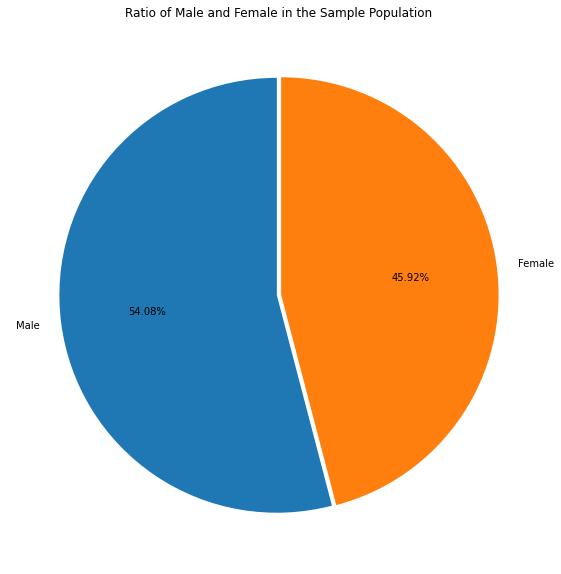

In [15]:
# Plotting the gender as a pie chart to see the proportion
fig, ax = plt.subplots()
ax.set_title('Ratio of Male and Female in the Sample Population')
plt.pie(df['Gender'].value_counts(),labels=['Male', 'Female'], autopct='%.2f%%', startangle=90, explode=[0.01,0.01]);

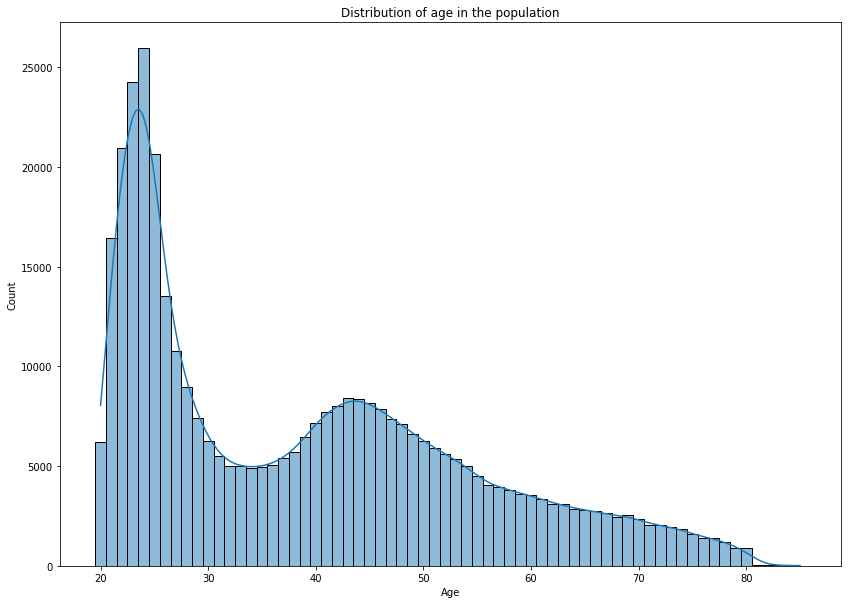

In [16]:
# Checking distribution of age
fig, ax = plt.subplots()
ax.set_title('Distribution of age in the population')
sns.histplot(df['Age'], kde=True, discrete=True);

# **The distribution of age of the population is left skewed and is dense around the age group of 21-28 years.**

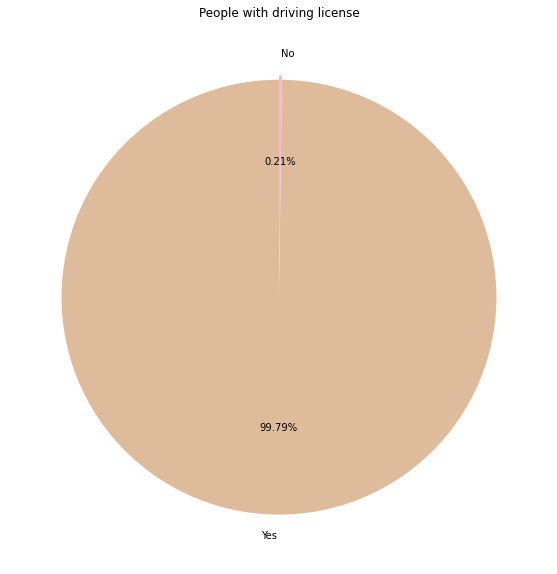

In [17]:
# Plotting the Driving_License as a pie chart to see the proportion of people holding driving license vs who dont have a license
colors = sns.color_palette('pastel')[5:7]
fig, ax = plt.subplots()
ax.set_title('People with driving license')
plt.pie(df['Driving_License'].value_counts(),labels=['Yes', 'No'], autopct='%.2f%%', colors=colors, startangle=90, explode=[0.01,0.01]);

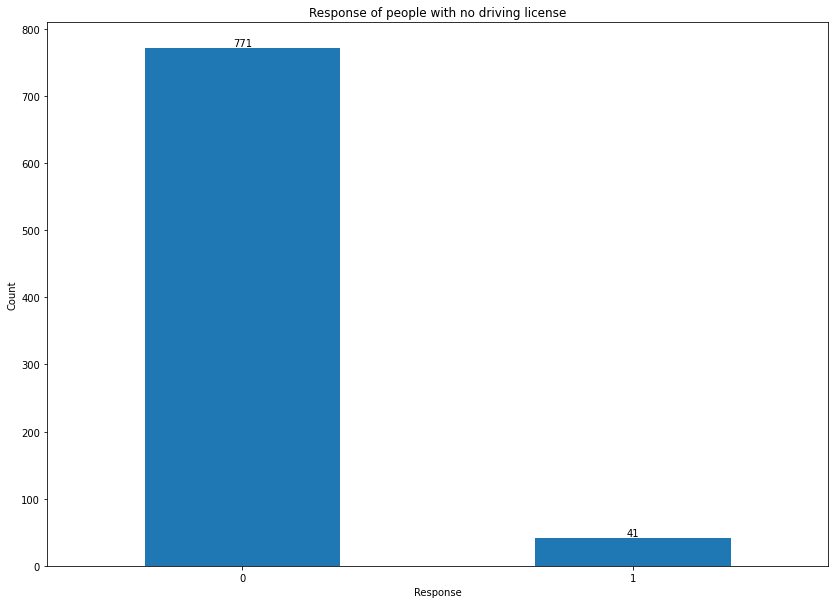

In [18]:
# Checking to see if the people with no driving licnse have responded with a yes
fig, ax = plt.subplots()
ax.set_ylabel('Count')
ax.set_title('Response of people with no driving license')
df.groupby('Driving_License')['Response'].value_counts()[0].plot(kind='bar')
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0]);

# **41 People who do not have a driving license have responded with Yes.**

There are 53 unique regions in the dataset
__________________________________________



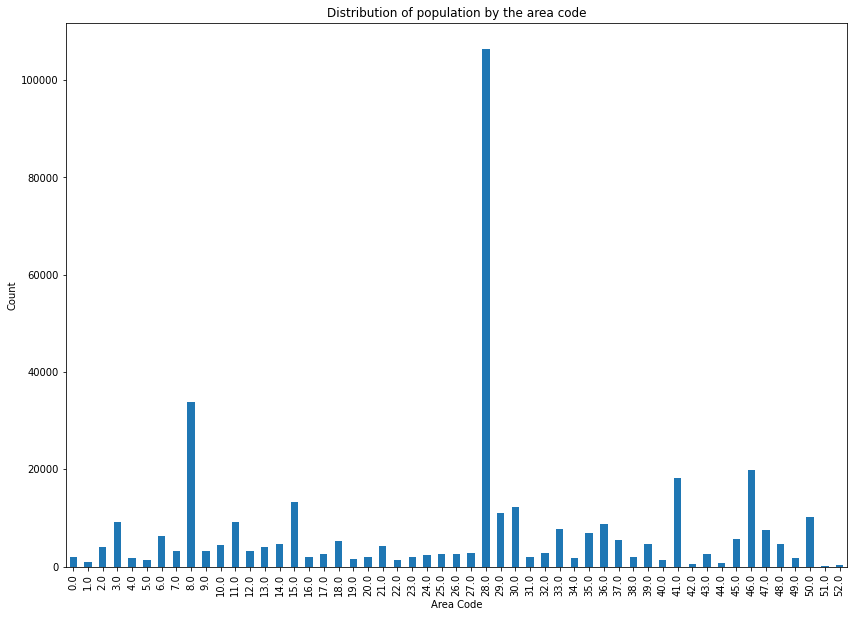

In [19]:
# Checking the number of unique region codes in the dataset
print(f"There are {df.Region_Code.nunique()} unique regions in the dataset")
print("__"*21+"\n")
fig, ax = plt.subplots()
ax.set_title('Distribution of population by the area code')
ax.set_ylabel('Count')
ax.set_xlabel('Area Code')
df.Region_Code.value_counts().sort_index().plot(kind='bar');

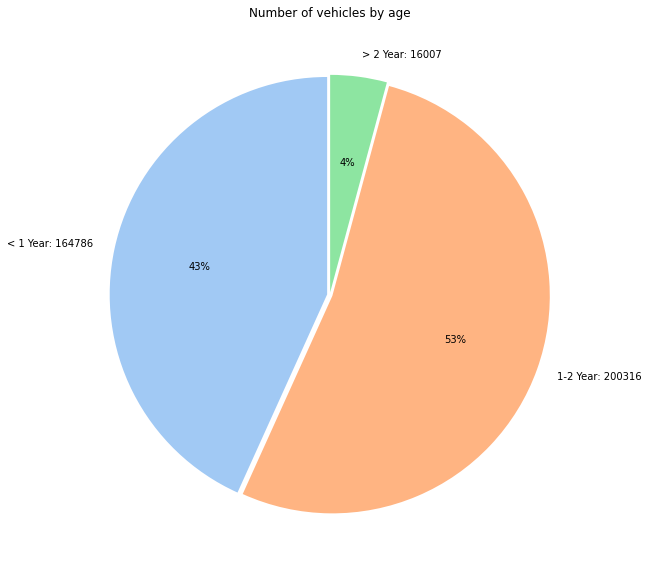

In [20]:
# Plotting number of vehicles by age
data = [df['< 1 Year'].sum(), df['1-2 Year'].sum(), df['> 2 Year'].sum()]
labels = ['< 1 Year' + f": {data[0]}", '1-2 Year'  + f": {data[1]}", '> 2 Year'  + f": {data[2]}"]
colors = sns.color_palette('pastel')[0:3]
fig, ax = plt.subplots()
ax.set_title('Number of vehicles by age')
plt.pie(data, labels=labels, colors=colors, autopct="%.0f%%", startangle=90, explode=[0.0125,0.0125,0.0125])
plt.show()

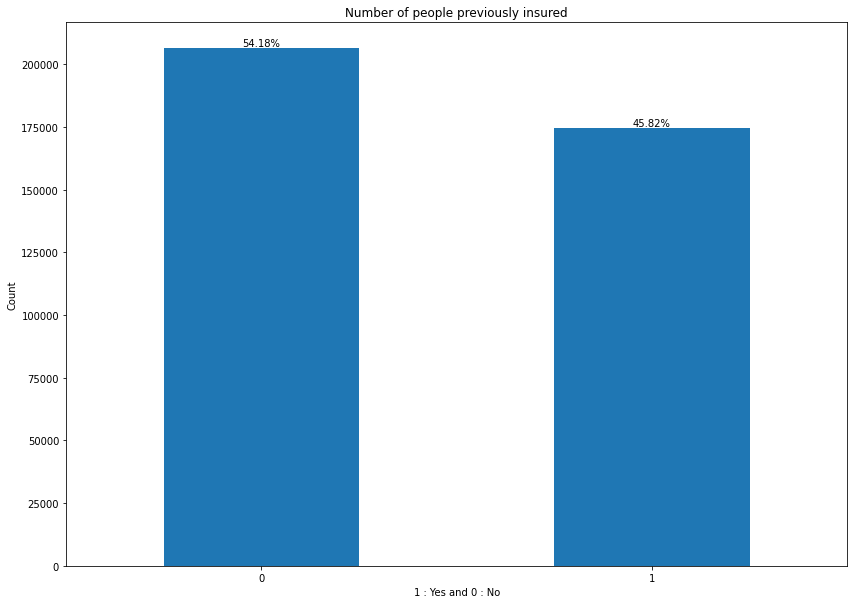

In [21]:
# Percentage of people previoulsy insured
fig, ax = plt.subplots()
ax.set_ylabel('Count')
ax.set_xlabel('1 : Yes and 0 : No')
ax.set_title("Number of people previously insured")
df['Previously_Insured'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], 
             labels=[f"{round((len(df)-df['Previously_Insured'].sum())/len(df)*100,2)}%", f"{round(df['Previously_Insured'].sum()/len(df)*100,2)}%"]
        );

In [22]:
df['Vehicle_Damage'].value_counts()

1    192413
0    188696
Name: Vehicle_Damage, dtype: int64

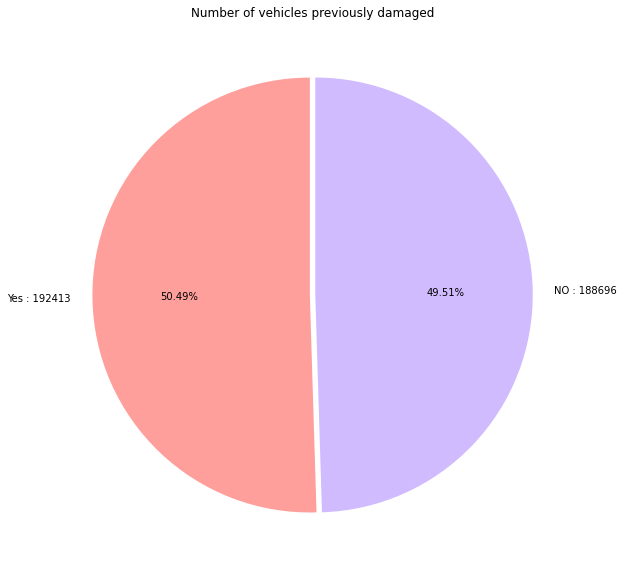

In [23]:
# Plotting to see the number of vehicles damaged out of total
fig, ax = plt.subplots()
ax.set_title("Number of vehicles previously damaged")
data = df['Vehicle_Damage'].value_counts()
colors = sns.color_palette('pastel')[3:5]
plt.pie(
    data,
    colors=colors,
    labels = [f"Yes : {df['Vehicle_Damage'].value_counts()[1]}", f"NO : {df['Vehicle_Damage'].value_counts()[0]}"],
    startangle=90,
    autopct="%.2f%%",
    explode=[0.0125,0.0125]
);


In [24]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Year
id,,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


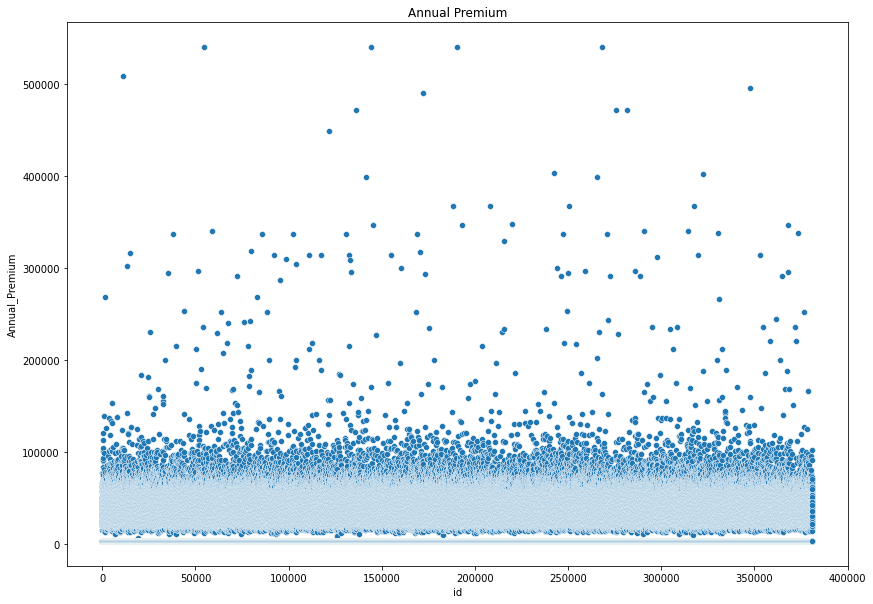

In [37]:
# Plotting scatterplot to check the spread of annual premium 
fig, ax = plt.subplots()
ax.set_title("Annual Premium")
sns.scatterplot(data=df['Annual_Premium']);

Association of customers with the company
__________________________________________

Newest customer is 10 days old
Oldest customer is 299 days old

__________________________________________



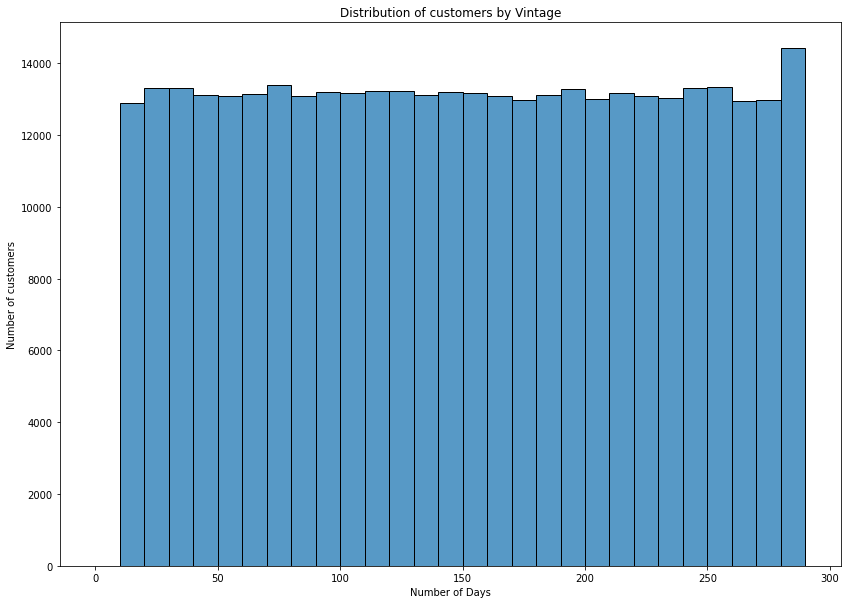

In [51]:
# Plotting a histogram to check the distribution of number of days a customer has been associated with the company (Vintage)
print("Association of customers with the company\n" + "__"*21 + "\n")
print(f"Newest customer is {min(df['Vintage'])} days old")
print(f"Oldest customer is {max(df['Vintage'])} days old\n")
print("__"*21 + "\n")
fig, ax = plt.subplots()
ax.set_title("Distribution of customers by Vintage")
ax.set_ylabel("Number of customers")
ax.set_xlabel("Number of Days")
sns.histplot(df['Vintage'], bins=[i for i in range(0,300,10)]);